In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [13]:
path = "./"
train = pd.read_csv(path + "train.csv",true_values='t',false_values='f')
test = pd.read_csv(path + "test.csv",true_values='t',false_values='f')

# Checking & Modifying Column Data Types

In [14]:
train['first_review'] = pd.to_datetime(train['first_review'])
train['host_since'] = pd.to_datetime(train['host_since'])
train['last_review'] = pd.to_datetime(train['last_review'])

# Calculating NaN %

In [15]:
train_nan = (train.isnull().sum() / train.shape[0]) * 100
train_nan = train_nan[train_nan>0]
train_nan

bathrooms                  0.269865
first_review              21.405729
host_has_profile_pic       0.253674
host_identity_verified     0.253674
host_response_rate        24.691341
host_since                 0.253674
last_review               21.355804
neighbourhood              9.272578
review_scores_rating      22.563452
thumbnail_url             11.086074
zipcode                    1.303450
bedrooms                   0.122789
beds                       0.176762
dtype: float64

In [21]:
original = train.shape[0]
# train = train.dropna(how='any', subset=['zipcode','property_type', 'bedrooms', 'beds', 'bathrooms'])
print('Number of NaN values removed:', original - train.shape[0])

train['dataset'] = "train"
test['dataset'] = "test"
data = pd.concat([train,test], axis = 0)
# data.set_index('id')

# Column Selection
data = data.drop(['name','thumbnail_url','neighbourhood','description','host_since'],axis=1)

data.loc[data['dataset'] == "test"].shape

Number of NaN values removed: 0


(25458, 25)

## Data Cleaning

In [22]:
print(data.loc[data['dataset'] == "test"].shape)
#Set Bedrooms to 1 whereever it is 0
data[data['bedrooms'] == 0]=1

# # drop any inconsistent values
# print('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
# print('Number of Beds 0:', len(data[data['beds'] == 0]))
# print('Number of Listings with Price 0', len(data[data['log_price'] == 0]))

# convert ZipCode
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')


(25458, 25)


## Accomodation Distribution

In [23]:
print(data.loc[data['dataset'] == "test"].shape)
# explore distribution of accommodates
print('Number of Unique Accomodation: ', np.unique(data['accommodates']))
for i in range(1, 17):
    print('Accommodation {}:'.format(i), len(data[data['accommodates'] == i]))

(23190, 25)
Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Accommodation 1: 21012
Accommodation 2: 37274
Accommodation 3: 8965
Accommodation 4: 15122
Accommodation 5: 4588
Accommodation 6: 6625
Accommodation 7: 1261
Accommodation 8: 2424
Accommodation 9: 342
Accommodation 10: 923
Accommodation 11: 115
Accommodation 12: 333
Accommodation 13: 44
Accommodation 14: 139
Accommodation 15: 64
Accommodation 16: 338


(23190, 25)


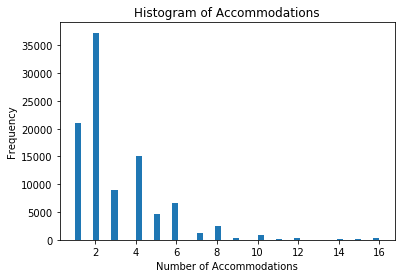

In [19]:
print(data.loc[data['dataset'] == "test"].shape)
import matplotlib.pyplot as plt
# visualize distribution of price (target variable)
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

(23190, 25)


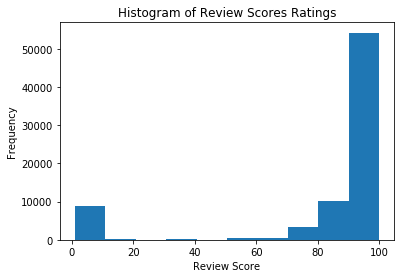

In [11]:
print(data.loc[data['dataset'] == "test"].shape)
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print(data.loc[data['dataset'] == "test"].shape)
# turn NaN scores with 0 reviews into 'No Reviews'
data.loc[data['number_of_reviews'] == 0, 'review_scores_rating'] = 'No Reviews'
data.loc[data['review_scores_rating'].isnull(), 'review_scores_rating'] = 'No Reviews'

# Calculate NaN %
data_nan = (data.isnull().sum() / data.shape[0]) * 100
data_nan = data_nan[data_nan>0]
print(data_nan)

print(data.review_scores_rating.head(5))

In [ ]:
print(data.loc[data['dataset'] == "test"].shape)
# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif int(val) >= 95:
        return '95-100'
    elif int(val) >= 90 and int(val) < 95:
        return '90-94'
    elif int(val) >= 85 and int(val) < 90:
        return '85-89'
    elif int(val) >= 80 and int(val) < 85:
        return '80-84'
    elif int(val) >= 70 and int(val) < 80:
        return '70-79'
    elif int(val) >= 60 and int(val) < 70:
        return '60-69'
    elif int(val) >= 50 and int(val) < 60:
        return '50-59'
    elif int(val) >= 40 and int(val) < 50:
        return '40-49'
    elif int(val) >= 30 and int(val) < 40:
        return '30-39'
    elif int(val) >= 20 and int(val) < 30:
        return '20-29'
    elif int(val) >= 10 and int(val) < 20:
        return '10-19'
    elif int(val) < 10.0:
        return '0-9'

data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))

In [ ]:
print('Number of remaining records:', len(data))

## One-hot-encode categorical variables

In [ ]:
categorical = ['property_type','room_type','bed_type','cancellation_policy','city','review_scores_rating']
data = pd.get_dummies(data, columns = categorical)

In [ ]:
data.room_type_1.head(10)

In [ ]:
#convert non-categorical variables to floats and standardize
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

# Remove % from host_response_rate
data['host_response_rate']=data['host_response_rate'].str[:-1].astype(float)

In [ ]:
data['log_price'].plot.hist()

In [ ]:
data.columns

In [ ]:
non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms','host_response_rate']
for col in non_cat_vars:
    data[col] = data[col].astype(float)
    data[col] = standardize_col(data[col])

# Calculate NaN %
data_nan = (data.isnull().sum() / data.shape[0]) * 100
data_nan = data_nan[data_nan>0]
print(data_nan)

train_y = data[data.dataset == "train"].log_price.values

# Select only numeric data and impute missing values as 0
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_x = data[data.dataset == "train"] \
    .select_dtypes(include=numerics) \
    .drop("log_price", axis = 1) \
    .fillna(0) \
    .values

test_x = data[data.dataset == "test"] \
    .select_dtypes(include=numerics) \
    .drop("log_price", axis = 1) \
    .fillna(0) \
    .values

print(test_x.shape)

In [ ]:
# Train a Random Forest model with cross-validation

from sklearn.model_selection import KFold

sample_leaf_options = [1]

for leaf_size in sample_leaf_options:
    print('Leaf Size: {}'.format(leaf_size))
    
    cv_groups = KFold(n_splits=1)
    
    regr = RandomForestRegressor(n_estimators = 200,oob_score = True,n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = leaf_size)

    for train_index, test_index in cv_groups.split(train_x):

        # Train the model using the training sets
        regr.fit(train_x[train_index], train_y[train_index])

        # Make predictions using the testing set
        pred_rf = regr.predict(train_x[test_index])

        # Calculate RMSE for current cross-validation split
        rmse = str(np.sqrt(np.mean((train_y[test_index] - pred_rf)**2)))

        print("RMSE for current split: " + rmse)

In [ ]:
# Create submission file
regr.fit(train_x, train_y)
final_prediction = regr.predict(test_x)

print(final_prediction.shape)
print(test.id.shape)

# submission = pd.DataFrame(np.column_stack([test.id, final_prediction]), columns = ['id','log_price'])
# submission.to_csv("sample_submission.csv", index = False)